# Imports

In [132]:
import math
import matplotlib.pyplot as plt
import numpy as np
import time

%matplotlib inline

# Natural Numbers

In [133]:
def generateNaturals(index):
    naturals = []
    for i in range(1, index):
        naturals.append(i)
    return naturals

# Primes

In [134]:
def generatePrimes(index):
    primes = [2,3]
    candidate = 5
    while primes[-1] < index:
        modCandidate = checkDivisibility(candidate, primes)
        if type(modCandidate) == int:
            primes.append(candidate)
        candidate += 2
    return primes

def checkDivisibility(number, primes):
    for p in primes:
        if p > math.sqrt(number):
            break
        if number % p == 0:
            return None
    return number

# Composites

In [135]:
def generateComposites(naturals, primes):
    composites = naturals.copy()
    for p in primes:
        if p in composites:
            composites.remove(p)
    return composites

# Gaussian Primes
*incomplete

In [136]:
def generateGaussians(primes):
    r_primes = primes.copy()
    g_primes = []
    for r in r_primes:
        if r % 4 == 3:
            g_primes.append(r_primes.pop(r_primes.index(r)))
    return g_primes, r_primes

# Fibonacci Numbers

In [137]:
def generateFibonacci(index):
    fibonacci = [1,1]
    while len(fibonacci) < index:
        fibonacci.append(fibonacci[-2] + fibonacci[-1])
    return fibonacci

# Lucas Numbers

In [138]:
def generateLucas(index):
    lucas = [1,3]
    while len(lucas) < index:
        lucas.append(lucas[-2] + lucas[-1])
    return lucas

# Initialize Data

In [139]:
index = 6000
naturals = generateNaturals(index)
primes = generatePrimes(index)
composites = generateComposites(naturals, primes)
g_primes, r_primes = generateGaussians(primes)
fibonacci = generateFibonacci(index)
lucas = generateLucas(index)

print("Naturals:", len(naturals))
print("Primes:", len(primes))
print("Composites:", len(composites))
print("Real Primes:", len(r_primes))
print("Gaussian Primes:", len(g_primes))
print("Fibonacci:", len(fibonacci))
print("Lucas:", len(lucas))

Naturals: 5999
Primes: 784
Composites: 5216
Real Primes: 501
Gaussian Primes: 283
Fibonacci: 6000
Lucas: 6000


# Composite Tests:

## Count Divisors

In [140]:
def divisors(number_set, primes):
    for n in number_set:
        result = checkDivisibility(n, primes)

## Heuristic Tests:
_heuristic_ 1.1 Computing - Proceeding to a solution by trial and error or by rules that are only loosely defined. [1]

### PSW Primality Test
If p is an odd number, and $p \equiv \pm 2\ (mod\ 5)$, then p will be prime if both the Fermat Test and Fibonacci Test are met.  [2]

### Fermat Test (base 2)

In [141]:
def fermatTest(number):
    if number % 2 == 0 or number < 3:
        return False
    else:
        result = 2 ** (number - 1) % number
    if result == 1:
        return True
    else:
        return False

### Fibonacci Test

In [142]:
def fibonacciTest(number):
    if number % 2 == 0 or number < 3:
        return False
    else:
        result = fibonacci[number + 1] % number
    if result == 0:
        return True
    else:
        return False

## Probabilistic Tests:
"...more rigorous than heuristics in that they provide provable bounds on the probability of being fooled by a composite number." [3]

### Baillie-PSW Primality Test
Let n be odd

In [143]:
index = 2000000
startTime = time.time()
primes = generatePrimes(index)
endTime = time.time()
print("Time:", endTime - startTime)
print(sum(primes[:-1]))

Time: 11.309134721755981
142913828922


# Spiral Function
#### This function takes in a set of numbers, and returns the (x,y) spiral coordinates for each number
Note:  The origin point, (0,0), is automatically included

In [144]:
def spiral(number_set):
    x_coord = [0]
    y_coord = [0]
    for n in number_set:
        argument = 2 * np.pi * np.sqrt(n)
        coefficient = math.sqrt(n)
        x_coord.append(coefficient * np.cos(argument))
        y_coord.append(coefficient * np.sin(argument))
    return x_coord, y_coord

# Generate Coordinate Points

In [145]:
xn, yn = spiral(naturals)
xc, yc = spiral(composites)
xp, yp = spiral(primes)
xr, yr = spiral(r_primes)
xg, yg = spiral(g_primes)

# Product Curves

In [146]:
parabola = []
for i in range(2,100):
    #parabola = []
    #for j in range(0,50):
    parabola.append(i**2 + i + 41)

xu, yu = spiral(parabola)

# Graphs

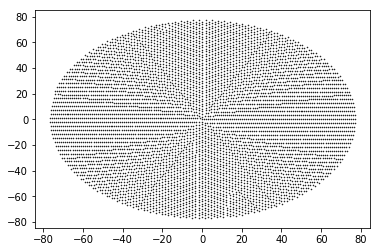

In [147]:
plt.plot(xn, yn, 'o', markersize = 0.5, color='k');

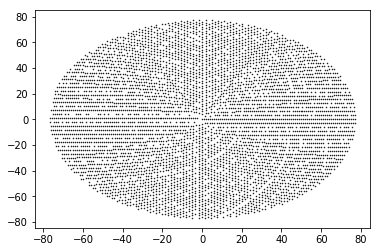

In [148]:
plt.plot(xc, yc, 'o', markersize = 0.5, color='k');

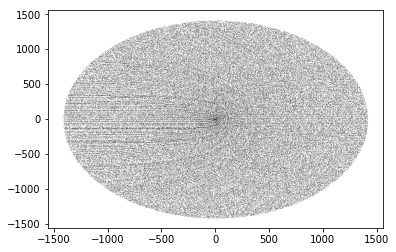

In [149]:
plt.plot(xp, yp, 'o', markersize = 0.025, color='k');

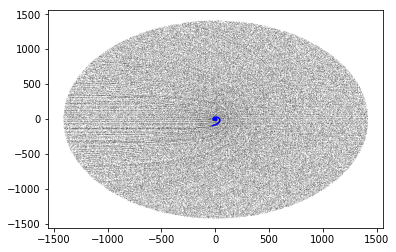

In [150]:
plt.plot(xp, yp, 'o', markersize = 0.025, color='k');
plt.plot(xu, yu, '-', markersize = 0.5, color='b');

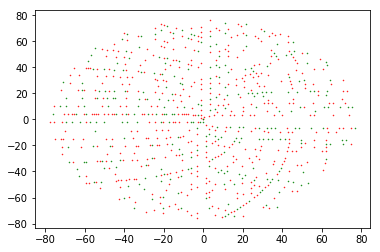

In [151]:
plt.plot(xr, yr, 'o', markersize = 0.5, color='red');
plt.plot(xg, yg, 'o', markersize = 0.5, color='green');

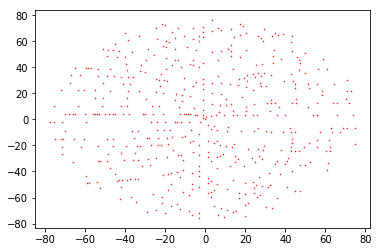

In [152]:
plt.plot(xr, yr, 'o', markersize = 0.5, color='red');

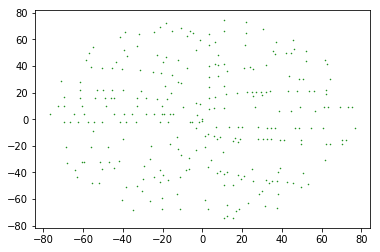

In [153]:
plt.plot(xg, yg, 'o', markersize = 0.5, color='green');
#plt.plot(xu, yu, '-', markersize = 0.5, color='b');

1    Oxford English Dicitonary https://en.oxforddictionaries.com/definition/heuristic<br />
2    Wikipedia https://en.wikipedia.org/wiki/John_Selfridge#Selfridge's_Conjecture_about_Primality_Testing<br />
3    Wikipedia https://en.wikipedia.org/wiki/Primality_test#Probabilistic_tests

* Maximum number of rows in Excel is 1,048,576
* Maximum number of columns 16,384